# Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Embedding,Dense,Dropout,SimpleRNN,Conv1D, MaxPooling1D,Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from purifytext import clean_text
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
imdb = pd.read_csv("IMDB Dataset.csv")
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
second_review = imdb.iloc[2,0]

# Cleaning the Text

In [5]:
imdb_clean=clean_text(dataframe=imdb,column_name='review',stemming=True, lemmatizing=False)


=== Cleaning Process ===

⬇️ Removing HTML Tags ⬇️


C:\Users\ADMIN\anaconda3\Lib\site-packages\purifytext\text_preprocessing.py:37: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")



⬇️ Lowercasing Text ⬇️

⬇️ Removing URLs ⬇️

⬇️ Removing Emojis ⬇️

⬇️ Removing Punctuation ⬇️

⬇️ Removing Special Characters ⬇️

⬇️ Removing Numbers ⬇️

⬇️ Removing Whitespace ⬇️

⬇️ Expanding Contractions ⬇️

⬇️ Removing Stopwords ⬇️

⬇️ Stemming Words ⬇️

=== Cleaning Completed ===



In [6]:
print(preprocessing_text(second_review))

NameError: name 'preprocessing_text' is not defined

In [7]:
imdb_clean.head()

,review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


In [8]:
# Encoding the sentiments
label_encoder = LabelEncoder()
imdb_clean['sentiment'] = label_encoder.fit_transform(imdb_clean['sentiment'])

In [9]:
x = imdb_clean['review'].values
y = imdb_clean['sentiment'].values
print(x[1])

wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Tokenizing the text

In [11]:
tokenizer = Tokenizer(oov_token="<nothing>")
tokenizer.fit_on_texts(x)

In [12]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for padding
vocab_size

174564

In [13]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [14]:
max_len=500

In [15]:
x_train=pad_sequences(x_train,padding='pre',maxlen=max_len)
x_test=pad_sequences(x_test,padding='pre',maxlen=max_len)

In [16]:
x_train[0]

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [17]:
print(x_text_sequence[1])

NameError: name 'x_text_sequence' is not defined

In [18]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# RNN Model

In [19]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(SimpleRNN(128, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          22344192  
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 22377217 (85.36 MB)
Trainable params: 22377217 (85.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, 
                    callbacks=[early_stopping_callback])

Epoch 1/10


1000/1000 [==============================] - 331s 328ms/step - loss: 1174259892224.0000 - accuracy: 0.6714 - val_loss: 0.7069 - val_accuracy: 0.5107
Epoch 2/10
 237/1000 [======>.......................] - ETA: 3:54 - loss: 1.2297 - accuracy: 0.5256

In [ ]:
y_pred = model.predict(x_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

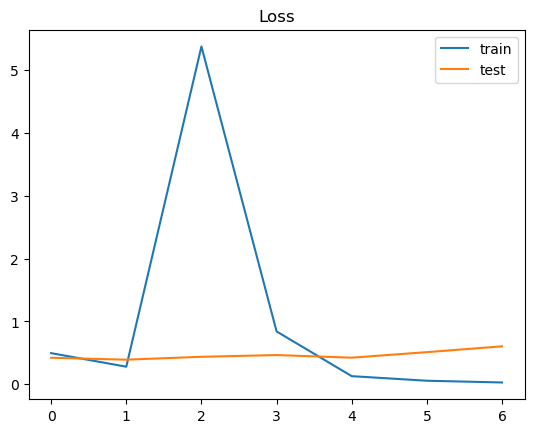

In [151]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

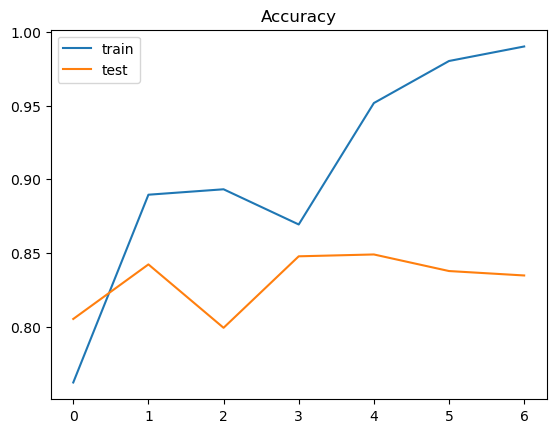

In [153]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

# RNN model evaluation

In [183]:
print("Classification Report of RNN model:\n",classification_report(y_test,y_pred_rounded))

Classification Report of RNN model:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      4961
           1       0.84      0.86      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# CNN Model

In [178]:
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=174564, output_dim=128, input_length=500))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))

In [179]:
cnn_model.compile(loss = "binary_crossentropy",metrics=['accuracy'],optimizer = 'adam')

In [180]:
cnn_history = cnn_model.fit(x_train,y_train,epochs=5,batch_size = 32,validation_split=0.2)

Epoch 1/5
1000/1000 [==============================] - 238s 237ms/step - loss: 0.3406 - accuracy: 0.8446 - val_loss: 0.2899 - val_accuracy: 0.8854
Epoch 2/5
1000/1000 [==============================] - 244s 244ms/step - loss: 0.1247 - accuracy: 0.9552 - val_loss: 0.3299 - val_accuracy: 0.8799
Epoch 3/5
1000/1000 [==============================] - 245s 245ms/step - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.4796 - val_accuracy: 0.8752
Epoch 4/5
1000/1000 [==============================] - 242s 242ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.6325 - val_accuracy: 0.8719
Epoch 5/5
1000/1000 [==============================] - 239s 239ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.7964 - val_accuracy: 0.8705


# CNN Model Evaluation

313/313 [==============================] - 10s 31ms/step


Text(95.72222222222221, 0.5, 'Truth')

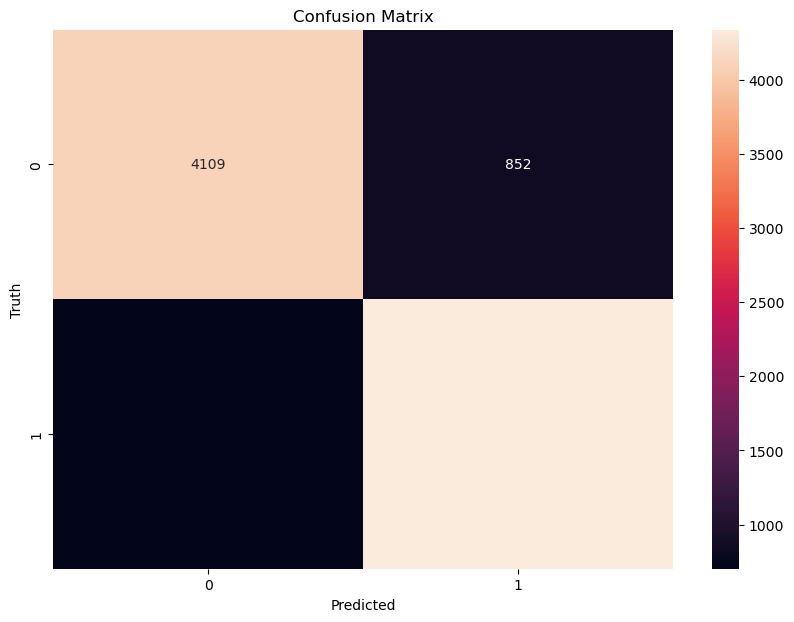

In [185]:
y_pred_cnn = model.predict(x_test)
y_pred_rounded_cnn = np.round(y_pred_cnn)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded_cnn)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [186]:
print("Classification report of CNN model:\n",classification_report(y_test,y_pred_rounded_cnn))

Classification report of CNN model:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      4961
           1       0.84      0.86      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# Model Testing

In [196]:
def predict_sentiment(text):
    new_input = tokenizer.texts_to_sequences([text])
    new_input = pad_sequences(new_input, maxlen=500)
    prediction = cnn_model.predict(new_input)
    if prediction[0][0] > 0.5:
        sentiment = "Positive"
    else:
        sentiment = "Negative"
    return sentiment

In [197]:
"""Run the cell below to test the model"""

'Run the cell below to test the model'

In [203]:
my_review_1 = input()
my_sentiment_1 = predict_sentiment(my_review_1)
print("The predicted sentiment is: ",my_sentiment_1)
# Success

 what an amazing movie!!!


1/1 [==============================] - 0s 25ms/step
The predicted sentiment is:  Positive


In [205]:
my_review_2 = input()
my_sentiment_2 = predict_sentiment(my_review_2)
print("The predicted sentiment is: ",my_sentiment)
# Success

 This movie successfully failed to impress me


1/1 [==============================] - 0s 31ms/step
The predicted sentiment is:  Negative


In [208]:
my_review_3 = input()
my_sentiment_3 = predict_sentiment(my_review_3)
print("The predicted sentiment is: ",my_sentiment_3)
# Failure

 Such a miserable movie it was!!


1/1 [==============================] - 0s 21ms/step
The predicted sentiment is:  Positive


In [212]:
my_review_4 = input()
my_sentiment_4 = predict_sentiment(my_review_4)
print("The predicted sentiment is: ",my_sentiment_4)
# Failure

 this movie failed to impress me


1/1 [==============================] - 0s 20ms/step
The predicted sentiment is:  Positive


# Conclusion 

In [192]:
"""
Overall both the models performed equally well on the "IMDB Rating 50k" dataset with accuracy of 84 %.
However the accuracy of the model could've been better if we had used a pre-trained model from huggingface
Thank you.
"""

'\nOverall both the models performed equally well on the "IMDB Rating 50k" dataset with accuracy of 84 %.\nHowever the accuracy of the model could\'ve been better if we had used a pre-trained model from huggingface\nThank you.\n'